In [1]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt # we will use this for plotting
from sklearn.model_selection import train_test_split # very handy way of selecting sets
import tensorflow as tf

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Feature extract 

                          Wine   Alcohol  Malic.acid       Ash       Acl  \
Wine                  1.000000 -0.328222    0.437776 -0.049643  0.517859   
Alcohol              -0.328222  1.000000    0.094397  0.211545 -0.310235   
Malic.acid            0.437776  0.094397    1.000000  0.164045  0.288500   
Ash                  -0.049643  0.211545    0.164045  1.000000  0.443367   
Acl                   0.517859 -0.310235    0.288500  0.443367  1.000000   
Mg                   -0.209179  0.270798   -0.054575  0.286587 -0.083333   
Phenols              -0.719163  0.289101   -0.335167  0.128980 -0.321113   
Flavanoids           -0.847498  0.236815   -0.411007  0.115077 -0.351370   
Nonflavanoid.phenols  0.489109 -0.155929    0.292977  0.186230  0.361922   
Proanth              -0.499130  0.136698   -0.220746  0.009652 -0.197327   
Color.int             0.265668  0.546364    0.248985  0.258887  0.018732   
Hue                  -0.617369 -0.071747   -0.561296 -0.074667 -0.273955   
OD          

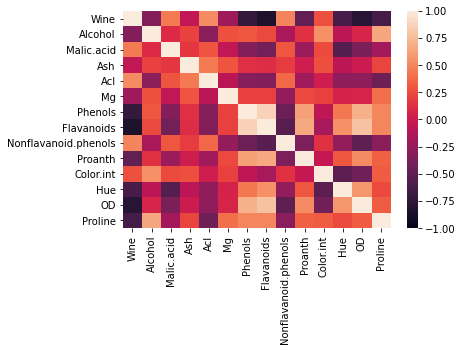

In [4]:
corr = data.corr(method='pearson')
import seaborn as sns
sns.heatmap(corr,vmin = -1, vmax = 1)
print(corr)


In [5]:
X_data = data.drop(['Wine','Ash'], axis=1)
Y_data = data.iloc[:,:1]
classes = Y_data.Wine.unique()
num_classes = len(classes)
print("Class Names :",classes)
print("Number of classes : ",num_classes)

Class Names : [1 2 3]
Number of classes :  3


loc is label-based, which means that you have to specify rows and columns based on their row and column labels.
iloc is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position).

In [6]:
X = X_data.values
Y = Y_data.values
print("Data types: ",type(X),type(Y))

Data types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.layers import Dense, Activation

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,test_size=0.25, random_state=55)

# building neural network
model = Sequential()
model.add(Dense(25, input_dim = X_train.shape[1], activation='relu'))#hidden lauyer 1
model.add(Dense(10,activation='relu')) #hidden layer 2
model.add(Dense(Y_train.shape[1],activation='softmax')) #output
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

model.fit(X_train, Y_train, verbose=2, epochs=100)

Epoch 1/100
5/5 - 0s - loss: 0.0000e+00
Epoch 2/100
5/5 - 0s - loss: 0.0000e+00
Epoch 3/100
5/5 - 0s - loss: 0.0000e+00
Epoch 4/100
5/5 - 0s - loss: 0.0000e+00
Epoch 5/100
5/5 - 0s - loss: 0.0000e+00
Epoch 6/100
5/5 - 0s - loss: 0.0000e+00
Epoch 7/100
5/5 - 0s - loss: 0.0000e+00
Epoch 8/100
5/5 - 0s - loss: 0.0000e+00
Epoch 9/100
5/5 - 0s - loss: 0.0000e+00
Epoch 10/100
5/5 - 0s - loss: 0.0000e+00
Epoch 11/100
5/5 - 0s - loss: 0.0000e+00
Epoch 12/100
5/5 - 0s - loss: 0.0000e+00
Epoch 13/100
5/5 - 0s - loss: 0.0000e+00
Epoch 14/100
5/5 - 0s - loss: 0.0000e+00
Epoch 15/100
5/5 - 0s - loss: 0.0000e+00
Epoch 16/100
5/5 - 0s - loss: 0.0000e+00
Epoch 17/100
5/5 - 0s - loss: 0.0000e+00
Epoch 18/100
5/5 - 0s - loss: 0.0000e+00
Epoch 19/100
5/5 - 0s - loss: 0.0000e+00
Epoch 20/100
5/5 - 0s - loss: 0.0000e+00
Epoch 21/100
5/5 - 0s - loss: 0.0000e+00
Epoch 22/100
5/5 - 0s - loss: 0.0000e+00
Epoch 23/100
5/5 - 0s - loss: 0.0000e+00
Epoch 24/100
5/5 - 0s - loss: 0.0000e+00
Epoch 25/100
5/5 - 0s - l